<a href="https://colab.research.google.com/github/Shoaib928/Investigate-a-Dataset-tmdb-movies/blob/main/Auto_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project: Auto MPG**

This notebook is an analysis and exploration of the dataset of the Auto MPG using numpy pandas and matplotlib.

**Question(s) for Analysis**

1. The distribution of displacement, horsepower, and weight.
2. The correlation between mpg and displacement, horsepower, and weight.

Import Numpy and Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Data Wrangling


In [2]:
#save dat by the url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

In [3]:
# Naming the columns
names = [
       'mpg'
    ,  'cyl'
    ,  'disp'
    ,  'hp'
    ,  'wt'
    ,  'acc'
    ,  'year'
    ,  'org'
    ,  'name'
]

In [4]:
#Load the dataframe
cars_df = pd.read_csv(url, sep = '\s+', names = names)
cars_df.head()

,mpg,cyl,disp,hp,wt,acc,year,org,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
cars_df.shape

(398, 9)

**Descriptive statistics**


In [6]:
cars_df.describe()

,mpg,cyl,disp,wt,acc,year,org
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [7]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    float64
 5   acc     398 non-null    float64
 6   year    398 non-null    int64  
 7   org     398 non-null    int64  
 8   name    398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
cars_df.dtypes

mpg     float64
cyl       int64
disp    float64
hp       object
wt      float64
acc     float64
year      int64
org       int64
name     object
dtype: object

The hp(horsepower) appears stringe.



**Data Cleaning**


Looking for hp unique values

In [9]:
cars_df['hp'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

There is '?' among the stringes numbers

Drop the rows containing '?'

In [10]:
cars_df = cars_df[cars_df .hp != '?']

In [11]:
cars_df["hp"].astype(float)

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: hp, Length: 392, dtype: float64

In [12]:
cars_df.dtypes

mpg     float64
cyl       int64
disp    float64
hp       object
wt      float64
acc     float64
year      int64
org       int64
name     object
dtype: object

the hp column is float 

In [13]:
cars_df.shape

(392, 9)

In [14]:
#looking for null
cars_df.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
wt      0
acc     0
year    0
org     0
name    0
dtype: int64

No NaN Values

In [15]:
#found duplicated
cars_df.duplicated().sum()

0

No Duplicated Values

In [16]:
#save clean cars df
clean_cars_df = cars_df.copy()

In [17]:
clean_cars_df.head()

,mpg,cyl,disp,hp,wt,acc,year,org,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [18]:
clean_cars_df.shape

(392, 9)

## **Visualization The Data**

#### Make a Boxplot for Displacemnt

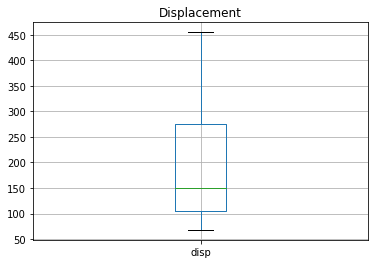

In [19]:
b_plot = clean_cars_df.boxplot(column = 'disp')
plt.title('Displacement')
b_plot.plot()
plt.show;

The Boxplot of Displacment

#### Make a Boxplot for Horsepower

In [20]:
#Convert the hp columns to numeric values
clean_cars_df["hp"] = pd.to_numeric(clean_cars_df["hp"])

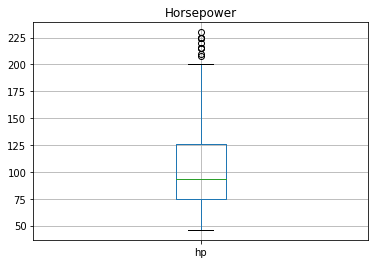

In [21]:
b_plot = clean_cars_df.boxplot(column = 'hp') 
plt.title('Horsepower')
b_plot.plot()
plt.show;

The Boxplot of Horsepower

#### Make a Boxplot for Weight

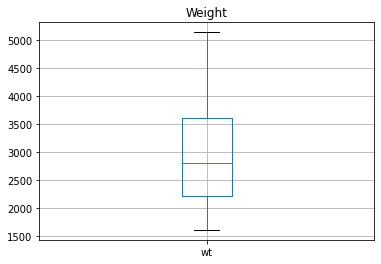

In [22]:
b_plot = clean_cars_df.boxplot(column = 'wt') 
plt.title('Weight')
b_plot.plot()
plt.show;

The Boxplot of Weight

#### Colleration Between MPG and Displacement

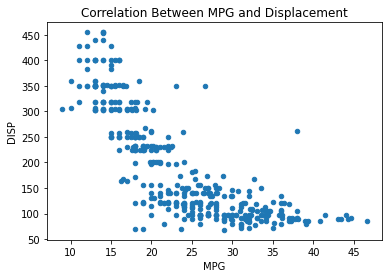

In [23]:
clean_cars_df.plot.scatter(x='mpg',y='disp');
plt.title("Correlation Between MPG and Displacement")
plt.xlabel("MPG")
plt.ylabel("DISP")
plt.show()

There is a negative correlation between Mpg and Displacement

#### Corrleation Between MPG and Horsepower

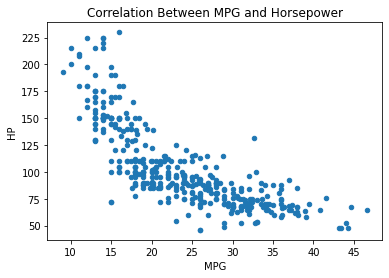

In [24]:
clean_cars_df.plot.scatter(x='mpg',y='hp');
plt.title("Correlation Between MPG and Horsepower")
plt.xlabel("MPG")
plt.ylabel("HP")
plt.show()

The is a negative correlation between MPG and Horsepower

#### Correlation between MPG and Weight

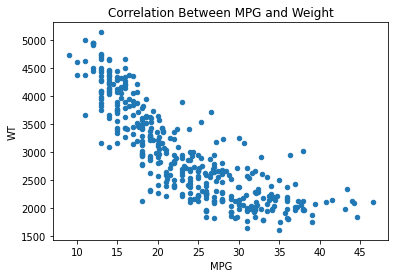

In [25]:
clean_cars_df.plot.scatter(x='mpg',y='wt');
plt.title("Correlation Between MPG and Weight")
plt.xlabel("MPG")
plt.ylabel("WT")
plt.show()

There is a negative realation between MPG and Weight

## Conclusion

The is a negative correlation between MPG and the displacement, horsepower, and weight of the car.

### limitation


It was almost clean data. the limatation was a little bit, It was the '?' in the horsepower column and the column itself was strings contain a floats values.